# Classification of Bike Buyers Case Study
## Adam Jones 6/2/2019

#### Loading required libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr

%matplotlib inline
from IPython.display import Image

#### Creating the pandas dataframe:
We load the pandas data from three separate csv files. We transform them to pandas dataframes with the column names. We perform two inner merges on the "Customer ID" column to create a final pandas dataframe with all our relevant data. The resulting dataframe has 17209 items each with 25 labels.

In [2]:
Custs = pd.read_csv('AdvWorksCusts.csv')
AveMonthSpend = pd.read_csv('AW_AveMonthSpend.csv')
BikeBuyer = pd.read_csv('AW_BikeBuyer.csv')
CustsAveMonthSpend = pd.merge(Custs, AveMonthSpend, on="CustomerID", how="inner")
Final = pd.merge(CustsAveMonthSpend, BikeBuyer, on="CustomerID", how="inner")
print("Shape: " + str(Final.shape[0]) + " points each with " + str(Final.shape[1]) + " labels")
Final.head()

Shape: 17209 points each with 25 labels


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1


In [3]:
print("Brief description of various properties of the numeric features of the data")
Final.describe()

Brief description of various properties of the numeric features of the data


,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000
mean,20200.378523,0.672671,1.508106,0.997211,2.016096,78084.818700,72.494625,0.331513
std,5354.643340,0.469252,1.137949,1.519436,1.685089,39616.621179,27.374399,0.470771
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,15531.000000,0.000000,1.000000,0.000000,0.000000,47773.000000,52.000000,0.000000
50%,20157.000000,1.000000,2.000000,0.000000,2.000000,76090.000000,68.000000,0.000000
75%,24850.000000,1.000000,2.000000,2.000000,3.000000,105065.000000,84.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


In [4]:
print("Number of null values per label")
Final.isnull().sum()

Number of null values per label


CustomerID                  0
Title                   17121
FirstName                   0
MiddleName               7189
LastName                    0
Suffix                  17207
AddressLine1                0
AddressLine2            16918
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
AveMonthSpend               0
BikeBuyer                   0
dtype: int64

We can see that some columns contain very little or no information. Thus, we can safely drop these columns. The resulting dataframe has 21 labels.

In [5]:
Final.dropna(axis = 1, inplace = True)
Final.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,Professional,F,S,1,4,5,5,92771,95,1


We can also drop a few columns we won't be using: "FirstName", "LastName", "AddressLine1", "City", "PostalCode", and "PhoneNumber". The participants names and phone numbers do not provide us with very little information we can use for the regression model. There shouldn't be any sort of correlation between their name or phone number, and whether or not they will buy a bike. Although the AddressLine1 and the city do provide us with some good information, it is very hard to extract useful information from these two columns, as it would be a categorical variable with a disproportionate number of labels. In addition, the specificity of the address and the city may cause us to overfit if we did use them. The Postal code can give us good information, such as the state of a location, but we already have this data. Besides, there are 6 countries represented in the data, each with a different postal system. Some of the other columns do not contain interpretable data, but we will be extracting data from these during the data preparation stage. Our data has 15 labels now.

In [6]:
Final.drop(["FirstName","LastName","AddressLine1","City","PostalCode","PhoneNumber"], axis=1, inplace=True)
Final.head()

,CustomerID,StateProvinceName,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,Queensland,Australia,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89,0
1,11001,Victoria,Australia,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117,1
2,11002,Tasmania,Australia,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,123,0
3,11003,New South Wales,Australia,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,50,0
4,11004,New South Wales,Australia,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,95,1


## Data preparation: Feature engineering
We engineer the features to produce good data which our model will be able to work with. We will perform four main actions:
- **Converting data** between various types. Numeric variables should have an integer or float data type which will be interpretable by our model. Categorical variables should be strings, booleans, etc. Sometimes it will be advantageous to convert categorical variables to numeric ones, for example if they represent a rank e.g. "big", "medium", "small". Other times, it may be advantageous to convert numeric variables to categorical variables, for example if they are only placeholders for booleans. Afterwards, we will encode the categorical variables using the "one hot encoding" system to allow our model to interpret the strings. This will be explained and performed at a later stage.
- **Aggregating categories** of categorical variables to reduce the number. Categorical features or labels with too many unique categories will limit the predictive power of a machine learning model. Aggregating categories can improve this situation, sometime greatly. However, one must be careful. It only makes sense to aggregate categories that are similar in the domain of the problem. Thus, domain expertise must be applied. 
- **Transforming numeric variables** to improve their distribution properties to make them more covariate with other variables. This process can be applied not only features, but to labels for regression problems. Some common transformations include, logarithmic and power included squares and square roots. 
- **Compute new features** from two or more existing features. These new features are often referred to as interaction terms. An interaction occurs when the behavior of say, the produce of the values of two features, is significantly more predictive than the two features by themselves. Consider the probability of purchase for a luxury mens' shoe. This probability depends on the interaction of the user being a man and the buyer being wealthy. As another example, consider the number of expected riders on a bus route. This value will depend on the interaction between the time of day and if it is a holiday. 

### Converting data

In [7]:
Final.dtypes

CustomerID               int64
StateProvinceName       object
CountryRegionName       object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
dtype: object

First we check the data types of the different columns, to make sure that the categorical variables have an object data type, and the numeric variables and boolean variables have an integer or float data type.

#### Age
The type of the "Birthdate" column is a string. The Birthdate is a numeric and not a categorical variable, so should be converted to some sort of integer in order to be interpreted by our model. We will compute the ages of the people from their birthdate. Since this data was sampled in 1998, their age at the time of data sampling will be 1998 minus the year in which they were born. We will ignore the specific date on which they were born as this shouldn't matter much, so we can remove the unnecessary BirthDate column now.

In [8]:
Final["Age"] = 1998 - (Final["BirthDate"].astype(str).str[0:4]).astype(int)
Final.drop("BirthDate", axis=1, inplace=True)
Final.head()

,CustomerID,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,11000,Queensland,Australia,Bachelors,Professional,M,M,1,0,0,2,137947,89,0,32
1,11001,Victoria,Australia,Bachelors,Professional,M,S,0,1,3,3,101141,117,1,33
2,11002,Tasmania,Australia,Bachelors,Professional,M,M,1,1,3,3,91945,123,0,33
3,11003,New South Wales,Australia,Bachelors,Professional,F,S,0,1,0,0,86688,50,0,30
4,11004,New South Wales,Australia,Bachelors,Professional,F,S,1,4,5,5,92771,95,1,30


### Aggregating Categories

For categorical variables, we will find the number of values in each category of the different categorical variables. We can do this by a simple count, or by visualising the count using a variety of graphs. For numeric variables, as they aren't discrete we can plot their distribution, to determine if we should instead split the data into ranges. If one of the values, or a certain section of values, is barely represented, it makes sense to combine this value with a nearby value, or to concatenate a few different values to produce a few value ranges, in order to reduce the number of categorical labels and unique categories. Or if we otherwise know that two categories are distinctly related, we may aggregate them.

We will then perform some visualisation to determine whether our aggregation was successful, and whether we actually need all these features. To decide if a feature plays a part in deciding whether or not a customer will buy a bike, or how much they will spend per month on average, we will visualise the features against AveMonthSpend. For categorical variables, we will accomplish this through box plots or violin plots. For numeric variables, we have a much larger range of visualisations to choose from, including various histograms and density plots, bin plots, and pairwise scatter plots. While there is no point in plotting the categorical variables against the Boolean bikebuyer, we can plot bikebuyer against the numeric variables.

The variables we might be concerned with are as follow:
- "Education"
- "Occupation"
- "CountryRegionName"
- "StateProvinceName"

Although the following aren't categorical variables, they are discrete variables which can only take certain values, so behave like categorical variables:
- "NumberCarsOwned
- "NumberChildrenAtHome"
- "TotalChildren"

In [9]:
#Here I am setting up the function we will use for bar charts of value counts
def value_counts(Final, col, tilt=30):
    counts = Final[col].value_counts()
    counts.plot.bar()
    if tilt != 0:
        plt.xticks(rotation=tilt, ha="right", rotation_mode="anchor")
    else:
        plt.xticks(rotation=tilt)
    plt.xlabel(col)
    plt.ylabel("count")
    plt.title(col + " value counts")
    plt.show()

In [10]:
#Here I am setting up the function we will use for singular box plots, which will be used when there are too many boxes for the
#violin plot to be interpreted visually
def plot_box(Final, col, col_y="AveMonthSpend"):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=Final, color="orange")
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel(col_y)
    plt.title("{} vs {}".format(col, col_y))
    plt.show()

In [11]:
#Here I am setting up the function we will use for the box and violin plots
def plot_box_violin(Final, col, tilt, col_y = "AveMonthSpend"):
    plt.figure(figsize=(12,4))
    sns.set_style("whitegrid")
    plt.subplot(1,2,1)
    sns.boxplot(col, col_y, data=Final, color="orange")
    if tilt != 0:
        plt.xticks(rotation=tilt, ha="right", rotation_mode="anchor")
    else:
        plt.xticks(rotation=tilt)
    plt.subplot(1,2,2)
    sns.violinplot(col, col_y, data=Final, color="orange")
    if tilt != 0:
        plt.xticks(rotation=tilt, ha="right", rotation_mode="anchor")
    else:
        plt.xticks(rotation=tilt)
    plt.suptitle("{} vs {}".format(col, col_y))
    plt.show()

In [12]:
def value_counts_plots(Final, col, tilt, col_y = "AveMonthSpend"):
    value_counts(Final,col,tilt)
    plot_box_violin(Final, col, tilt, col_y)

**Education**

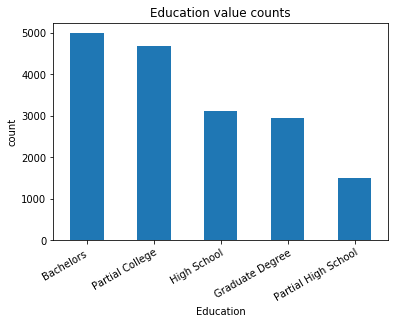

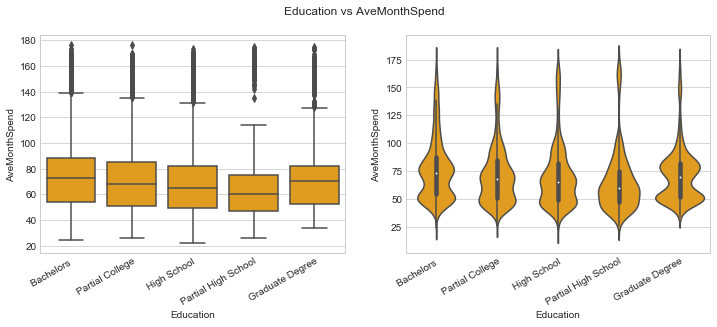

In [13]:
value_counts_plots(Final, "Education", 30)

None of the education categories seem to be grossly under-represented. The box plots show that the education level attained does impact the AveMonthSpend, with those who only partially complete high school spending less per month on bikes.

**Occupation**

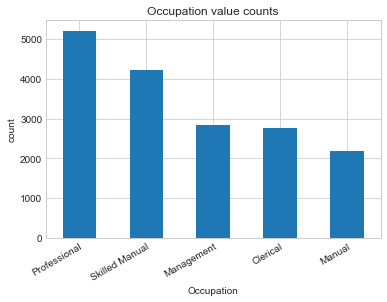

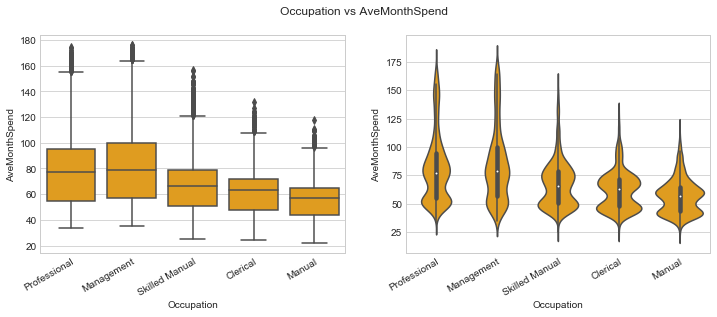

In [14]:
value_counts_plots(Final, "Occupation", 30)

None of the occupation categories seem to be grossly under-represented. There is a definite trend regarding the impact of occupation on the AveMonthSpend of customers. Those with manual or clerical jobs spend far less per month on bikes than those with professional or management jobs.

**Country**

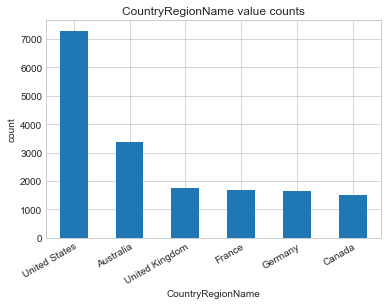

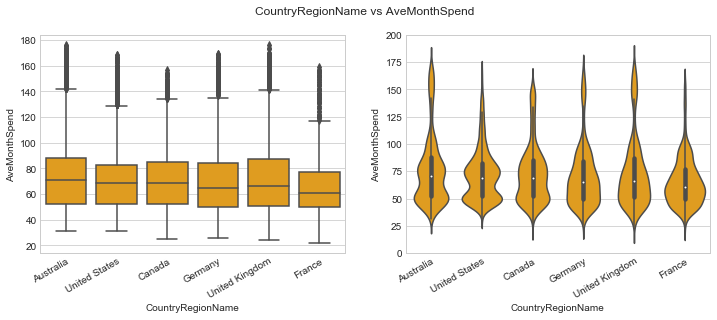

In [15]:
value_counts_plots(Final, "CountryRegionName", 30)

None of the country categories seem to be grossly under-represented. There are differences between the AveMonthSpend in different categories, but these aren't very extreme, although people from France seem to spend less on bikes.

**State**

In [16]:
print("Number of unique values of StateProvinceName")
len(Final["StateProvinceName"].unique())

Number of unique values of StateProvinceName


52

The "StateProvinceName" label has 52 different categories. This is far too many for our model and will certainly overfit. One way we could deal with this is by treating this column as superfluous and deleting it from the model, as the country column may give us enough information to distinguish between the spending patterns of people in different areas. However, there is a chance that that state column will be statistically significant in influencing spending patterns, so we shouldn't ignore it until we are satisfied that it isn't important. Furthermore, performing data preparation on this column can help demonstrate some of the important techniques used. Thus, we will aggregate some of these categories based on the frequency distribution, as well as our geographical knowledge of which states are close together. We will perform this aggregation for each country, as we know that a state which appears in one country will not appear in another, and there is thus independence.

##### USA States

USA State value counts
California        4123
Washington        2164
Oregon             962
New York             6
Illinois             6
Texas                4
Ohio                 4
Maryland             4
Georgia              3
Florida              2
Arizona              2
Utah                 2
Massachusetts        1
Alabama              1
Wyoming              1
Mississippi          1
Minnesota            1
North Carolina       1
South Carolina       1
Missouri             1
Kentucky             1
Virginia             1
Name: StateProvinceName, dtype: int64



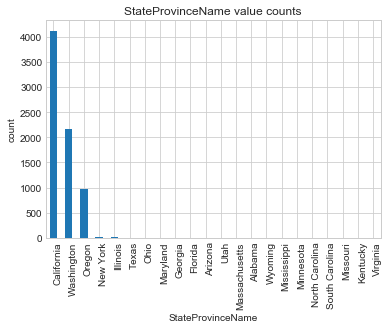

In [17]:
print("USA State value counts")
print((Final.loc[(Final["CountryRegionName"] == "United States"), "StateProvinceName"].value_counts()))
print("")
value_counts(Final.loc[(Final["CountryRegionName"] == "United States")], "StateProvinceName", 90)

As we can see, for the United States, there are a large number of states for which there are very few samples. In fact, there are only three states which have a large enough range of samples: California, Washington, and Oregon. We must then decide how best to aggregate this data.

USA states
<img src="img/USA_states.png">

As the map shows, California, Washington, and Oregon all lie on the West coast, very close to each other. Thus, they shouldn't vary that much from each other. It is unfortunate that we should have such a bad distribution of locations, with most of the rest of the USA barely represented. The best possible resolution would be to divide the states into two halves geographically: one category for the northern horizontal section, and another category for the southern horizonal section. I have thus divided the USA horizontally along the northern border of California. It is interesting to note that the middle vertical strip of the USA is barely represented in our data. Although it was thus tempting to group the US states into East Coast and West Coast because of this divide, the overwhelming majority of our data is on the West Coast, causing an imbalance if we chose to divide the USA in this way.

In [18]:
USASouth = ["California", "Texas", "Georgia", "Arizona", "Utah", "Florida", "South Carolina", "Virginia", "North Carolina", "Kentucky", "Missouri", "Alabama", "Mississippi"]
for state in USASouth:
    Final.loc[(Final["CountryRegionName"] == "United States") & (Final["StateProvinceName"] == state), "StateProvinceName"] = "USASouth"
Final.loc[(Final["CountryRegionName"] == "United States") & (Final["StateProvinceName"] != "USASouth"), "StateProvinceName"] = "USANorth"

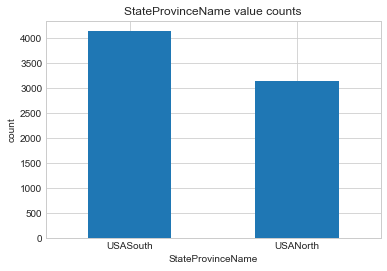

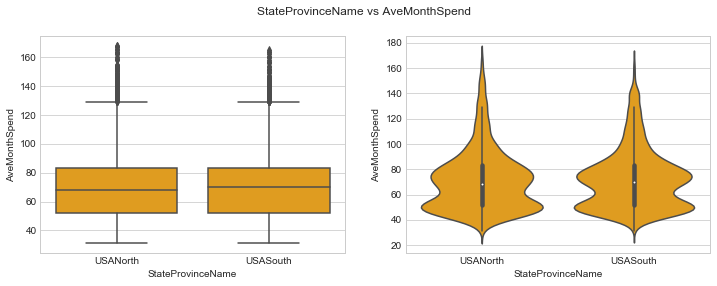

In [19]:
value_counts_plots(Final.loc[(Final["CountryRegionName"] == "United States")], "StateProvinceName", 0)

As you can see, our aggregation of the USA states has produced only 2 unique categories from 22 unique categories. The categories are quite evenly sized, which is good for our model. However, there doesn't seem to be that much distinction between our USANorth and USASouth categories.

##### Australia states

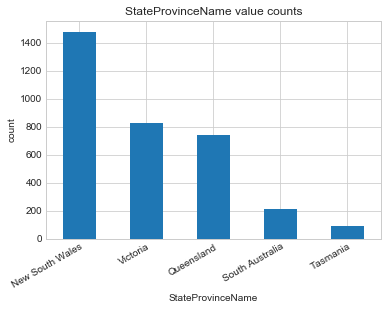

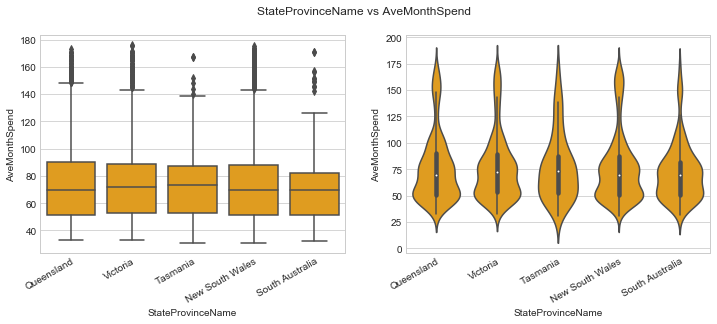

In [20]:
value_counts_plots(Final.loc[(Final["CountryRegionName"] == "Australia")], "StateProvinceName", 30)

Australia states
<img src="img/Australia_states.jpg">

While the spread of Australian states is much better than that of the USA, Tasmania accounts for only 2.7% of the Australian data points, and South Australia 6.3%. Australia is interesting because some of its states are islands away from the mainland. Islands can represent different behaviour, for example Tasmania differs hugely from Mainland Australia culturally and socioeconomically, which could produce different behaviour. The Australian Capital Territory is also engulfed within a larger state, making it a good candidate for aggregation had we any samples from the Australian Capital Territory. The distribution with regards to AveMonthSpend doesn't vary that much, meaning that the State of residence isn't a big factor for Australia.

##### United Kingdom states

United Kingdom State value counts
England    1751
Name: StateProvinceName, dtype: int64



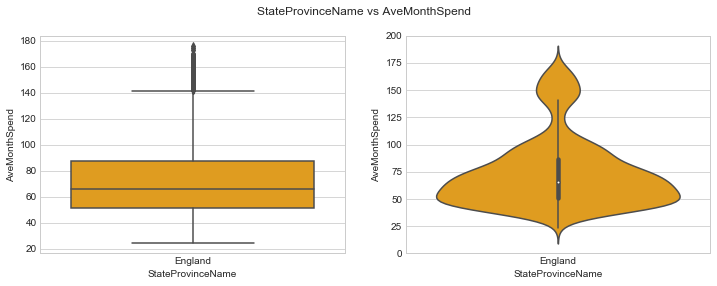

In [21]:
print("United Kingdom State value counts")
print((Final.loc[(Final["CountryRegionName"] == "United Kingdom"), "StateProvinceName"].value_counts()))
print("")
plot_box_violin(Final.loc[(Final["CountryRegionName"] == "United Kingdom")], "StateProvinceName", 0)

There is only a single UK "State" represented (The UK doesn't have states per se). However, all the people in our data sample happened to come from the UK, so we don't have to worry about any aggregation.

##### France states

France State value counts
Seine (Paris)        362
Seine Saint Denis    269
Nord                 254
Hauts de Seine       175
Yveline              149
Essonne              145
Seine et Marne        52
Loiret                52
Moselle               49
Garonne (Haute)       32
Val d'Oise            27
Val de Marne          26
Loir et Cher          22
Somme                 20
Charente-Maritime     19
Pas de Calais         15
Name: StateProvinceName, dtype: int64



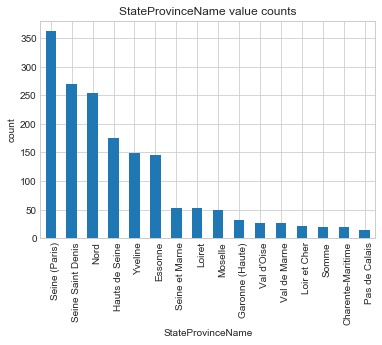

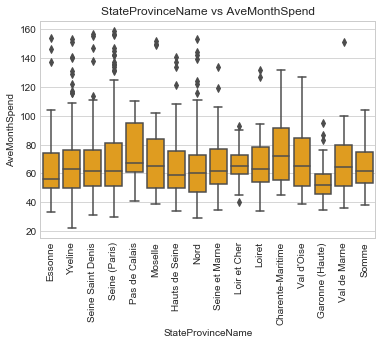

In [22]:
print("France State value counts")
print((Final.loc[(Final["CountryRegionName"] == "France"), "StateProvinceName"].value_counts()))
print("")
value_counts(Final.loc[(Final["CountryRegionName"] == "France")], "StateProvinceName", 90)
plot_box(Final.loc[(Final["CountryRegionName"] == "France")], "StateProvinceName")

There is quite a range of states represented in France, 16 in total. However, some of these categories don't have very many points at all. We should try and narrow down this large range of categories through some sort of aggregation.

France departments
<img src="img/france_departments.png">

These aren't actually French provinces or states, but are instead "departments", a smaller region, explaining why there are so many. There are 96 departments in total. Each department is part of a larger province. There are 22 provinces in total. Each province is grouped into a larger region. There are 13 regions of mainland france. A sensible way to aggregate the departments would be to group them into their regions.

France regions
<img src="img/france_regions.png">

In [23]:
franceDepartmentToProvince = [("Seine (Paris)","ile-de-france"),("Seine Saint Denis","ile-de-france"),("Nord","hauts-de-france"),("Hauts de Seine","ile-de-france"),("Yveline","ile-de-france"),("Essonne","ile-de-france"),("Seine et Marne","ile-de-france"),("Loiret","centre-val de loire"),("Moselle","grand est"),("Garonne (Haute)","occitanie"),("Val d'Oise","ile-de-france"),("Val de Marne","ile-de-france"),("Loir et Cher","centre-val de loire"),("Somme","hauts-de-france"),("Charente-Maritime","novelle-aquitaine"),("Pas de Calais","hauts-de-france")]
for i in franceDepartmentToProvince:
    Final.loc[(Final["CountryRegionName"] == "France") & (Final["StateProvinceName"] == i[0]), "StateProvinceName"] = i[1]

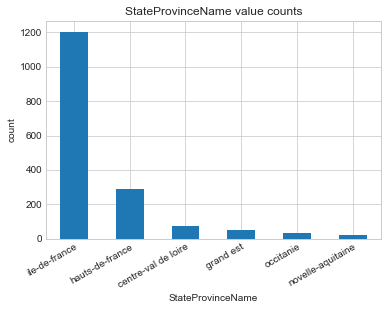

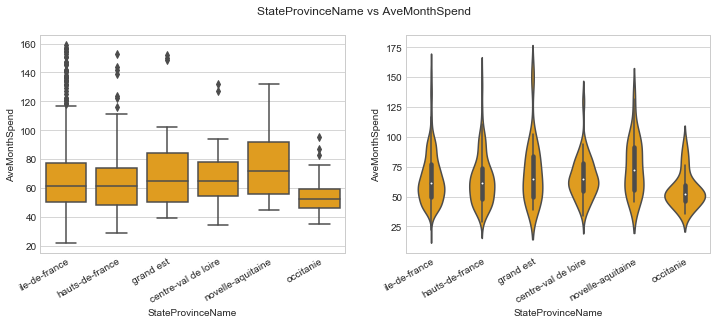

In [24]:
value_counts_plots(Final.loc[(Final["CountryRegionName"] == "France")], "StateProvinceName", 30)

While we have managed to significantly reduce the number of categories, there is still a disproportionate number of samples represented by a single region: "ile-de-france". Furthermore, only six out of thirteen of the regions of france are represented in our data, with no samples for regions in the south-east or north-west. There is a visible distinction in spending patterns in different regions, but much of this may be due to small sample sizes for some regions.

##### Germany states

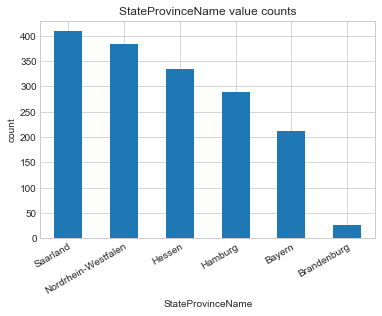

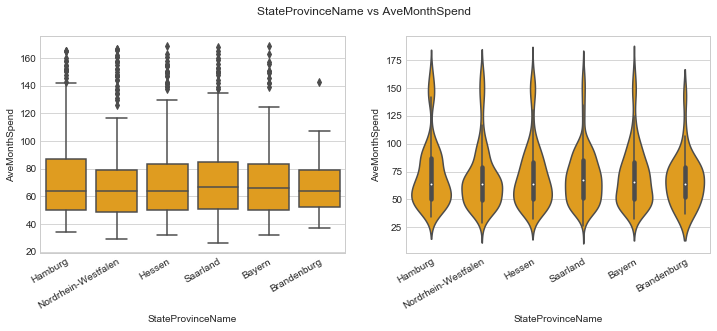

In [25]:
value_counts_plots(Final.loc[(Final["CountryRegionName"] == "Germany")], "StateProvinceName", 30)

Germany states
<img src="img/germany_states.png">

Germany doesn't have too many states represented. While this is bad for the diversity of our data, it means that we don't have to perform any aggregation. The way Germany is split into states is interesting because there are many states which are completely engulfed in larger states, which would be good candidates for aggregation. However, we only have a limited number of states represented, and none of this kind. We mainly have states from West Germany represented, and only 27 data samples from Brandenburg in East Germany, meaning our model might perform less well for East German states. The AveMonthSpend doesn't vary hugely between the states of Germany, meaning that it doesn't play that much of a factor for Germany.

##### Canada states

Canada State value counts
British Columbia    1479
Alberta               10
Name: StateProvinceName, dtype: int64



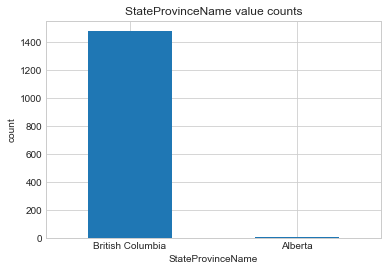

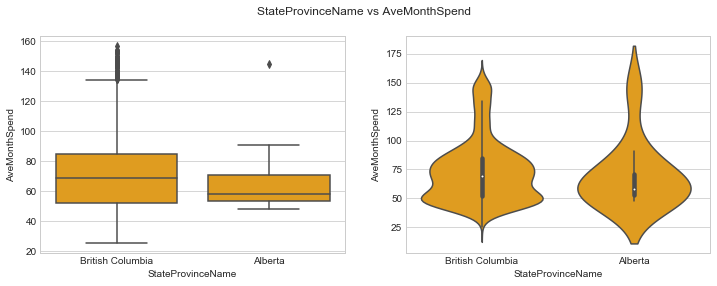

In [26]:
print("Canada State value counts")
print((Final.loc[(Final["CountryRegionName"] == "Canada"), "StateProvinceName"].value_counts()))
print("")
value_counts_plots(Final.loc[(Final["CountryRegionName"] == "Canada")], "StateProvinceName", 0)

Canada States
<img src="img/canada_states.jpg">

We only have two states represented from Canada, neighbouring states in the south-west corner of Canada. Of these two states, the overwhelming majority of data is from British Columbia, with only data samples (less than 1%). You may notice that the box plot for Alberta looks very squashed compared to that of British Columbia. This is because there is such a small range of points for Alberta, and probably not because people in Alberta spend in a much narrower price range. Using this in our model will probably cause overfitting of points in Alberta. Thus, I will aggregate the states of Canada into the single state of "Canada".

In [27]:
Final.loc[(Final["CountryRegionName"] == "Canada"), "StateProvinceName"] = "Canada"

In [28]:
print("Canada State value counts")
print((Final.loc[(Final["CountryRegionName"] == "Canada"), "StateProvinceName"].value_counts()))

Canada State value counts
Canada    1489
Name: StateProvinceName, dtype: int64


##### Is StateProvinceName really a useful label, and should we keep it?

Although sometimes it is obvious that certain labels should have no impact on a particular outcome (although there may be a correlation). An example of this is the first name in our data set, which wouldn't have any conceivable impact on whether or not a person would buy a bike, or how much they would spend on bikes per month. However, some other factors, such as the state in which the person lives, may have a conceivable impact, for example due to socioeconomic, cultural, or geographic factors. For these labels, we should still explore the possibility of a real impact on our results.

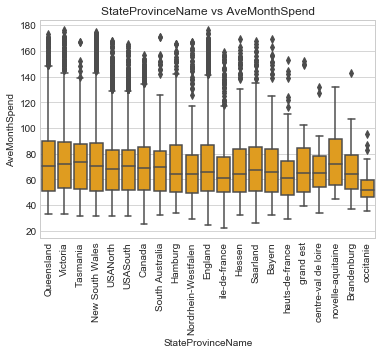

In [29]:
plot_box(Final, "StateProvinceName")

The StateProvinceName label does show variation after we have performed our aggregation for all the different countries. However, I suspect much of the larger variation is because of a limited sample of points for a specific state, causing the range of AveMonthSpend values not to represent a general sample. However, for the majority of cases StateProvinceName does seem to contain some good information which might help make a prediction.

##### Number of Cars Owned

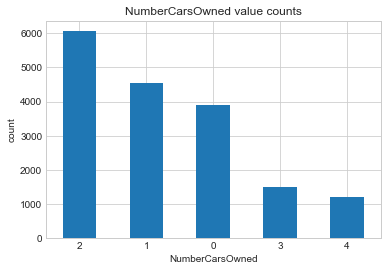

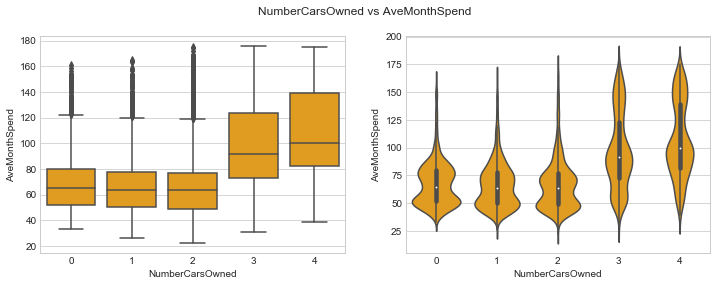

In [30]:
value_counts_plots(Final, "NumberCarsOwned", 0)

We can see from the box plot that the spending habits of those who own 1-3 cars is quite similar, but very different from the spending patterns of people with three or four cars. Thus, it makes sense to aggregate the categories of 0-2 cars into one category, and the categories of 3-4 cars into another category. Doing this changes the type of the variable from a numeric variable into a categorical variable. This makes more sense as this particular variable doesn't seem to exhibit a correlation with AveMonthSpend as NumberCarsOwned increases, but instead exhibits categorical behaviour.

In [31]:
Final.loc[(Final["NumberCarsOwned"] == 3) | (Final["NumberCarsOwned"] == 4), "NumberCarsOwned"] = "ThreeToFour"
Final.loc[(Final["NumberCarsOwned"] == 0) | (Final["NumberCarsOwned"] == 1) | (Final["NumberCarsOwned"] == 2), "NumberCarsOwned"] = "ZeroToTwo"

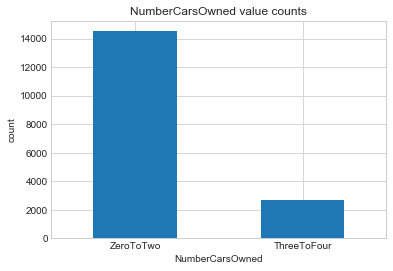

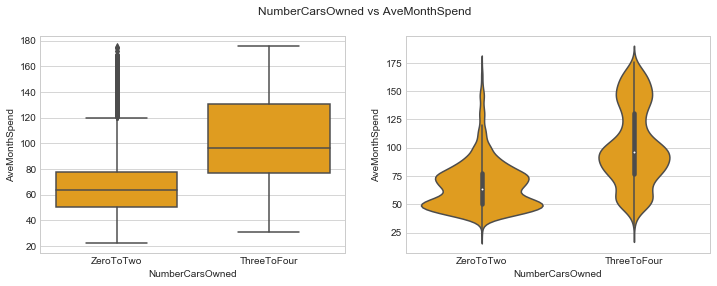

In [32]:
value_counts_plots(Final, "NumberCarsOwned", 0)

These new two categories demonstrate very good separation, with the interquartile of sections of the categories barely overlapping.

##### Number of Children At Home

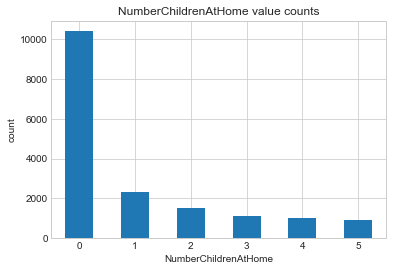

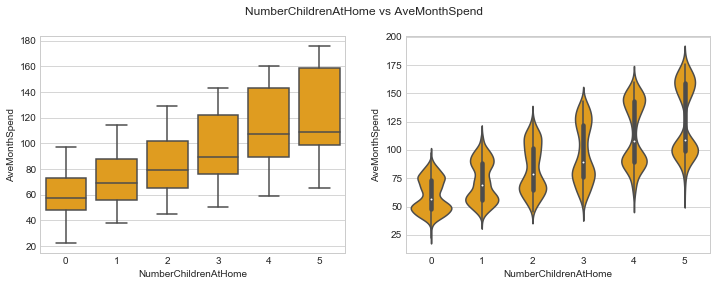

In [33]:
value_counts_plots(Final, "NumberChildrenAtHome", 0)

There is no obvious distinction between the different categories of NumberChildrenAtHome, and there is thus no sensible way to aggregate the categories. AveMonthSpend shows an obvious linear increase as the category increases, meaning it makes sense to keep it as a numeric variable to retain this mathematical correlation.

##### Total Number of Children

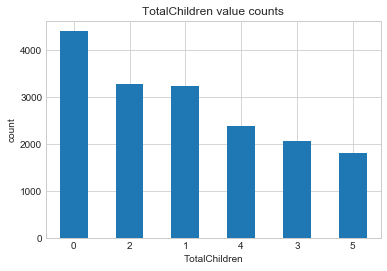

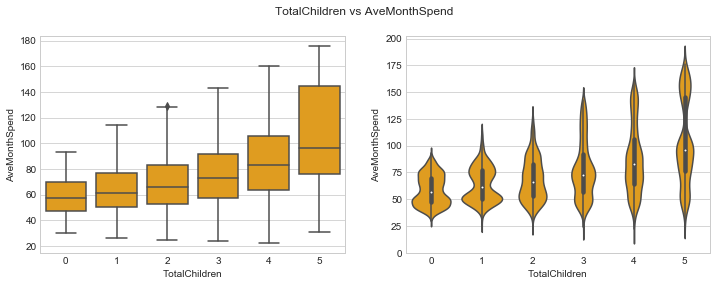

In [34]:
value_counts_plots(Final, "TotalChildren", 0)

There is no obvious distinction between the different categories of TotalChildren, and there is thus no sensible way to aggregate the categories. AveMonthSpend shows a correlation with TotalChildren, meaning it makes sense to keep it as a numerical variable.

### Transforming Numeric variables

The points on the scatter plot are made semi-transparent to understand the density of the points. There are some definite trends in the data, with those with higher YearlyIncomes tending to have higher AveMonthSpend, and the AveMonthSpend increasing with age until a peak and about 36, then decreasing with age.

In [35]:
#Here I am setting up a function for plotting the frequency density of labels
def plot_density_hist(Final, col, bins = 10, hist = False):
    sns.set_style("whitegrid")
    sns.distplot(Final[col], bins = bins, hist = hist)
    plt.title("Histogram of " + col)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

In [36]:
#Here I am setting up a function for plotting the logarithm of the frequency density of labels
def plot_log_density_hist(Final, col, bins = 10, hist = False):
    sns.set_style("whitegrid")
    sns.distplot(np.log(Final[col]), bins = bins, hist = hist)
    plt.title("Histogram of log " + col)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

**Yearly Income**

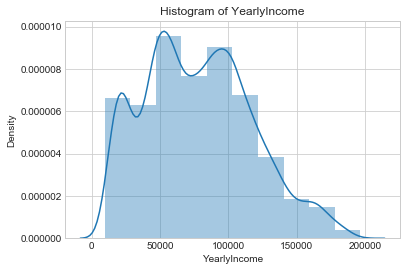

In [37]:
plot_density_hist(Final, "YearlyIncome", bins=10, hist=True)

The frequency density of the YearlyIncome is right skewed and multimodal. Given that there are no values less than zero, let's see if a logarithmic transformation can help us reduce the skew.

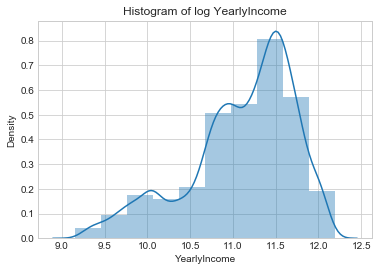

In [38]:
plot_log_density_hist(Final, "YearlyIncome", bins=10, hist=True)

The logarithmic transformation has help reduce the multiple modes of the frequency density, but has made the skew even worse. We won't apply this transformation to this label.

**Age**

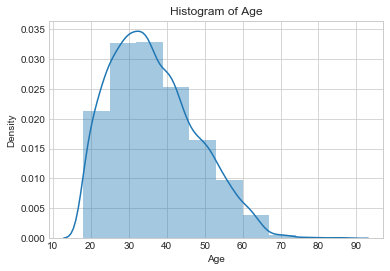

In [39]:
plot_density_hist(Final, "Age", bins=10, hist=True)

Although the frequency density of age shows a nice peak, it is right skewed. Given that there are no values less than zero, let's see if a logarithmic transformation will help reduce the skew.

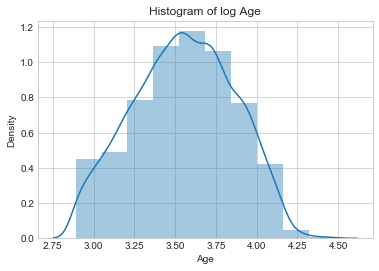

In [40]:
plot_log_density_hist(Final, "Age", bins=10, hist=True)

The logarithmic transformation has nicely reduced the skew of the frequency density of age to make it more symmetrical. We will apply this transformation to this label.

In [41]:
Final["Age"] = np.log(Final["Age"])

**Average Monthly Spendage**

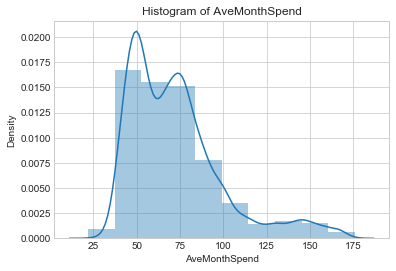

In [42]:
plot_density_hist(Final, "AveMonthSpend", bins=10, hist=True)

The frequency density of price is slightly multimodal and shows some right skew. Given that there are no values less than zero, let's see if a logarithmic transformation helps reduce the skew and make the frequency density more symmetrical.

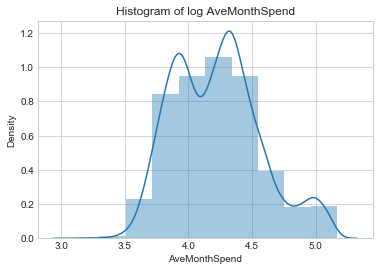

In [43]:
plot_log_density_hist(Final, "AveMonthSpend", bins=10, hist=True)

Although the logarithmic transformation has made the multimodal tendency slightly worse, it has improved the skew of the frequency density and made it much more symmetrical. We will be applying this transformation to this label.

In [44]:
Final["AveMonthSpend"] = np.log(Final["AveMonthSpend"])

## Visualising Data for Classification

### Categorical variables

To visualise whether or not categorical variables are effective in classifying points are BikeBuyer or not BikeBuyer, we will plot barcharts of the categorical variables with separate bars for BikeBuyer being 0 and 1. If the categorical variable is a good predictor, the bars of BikeBuyer for the same category of the same variable should differ.

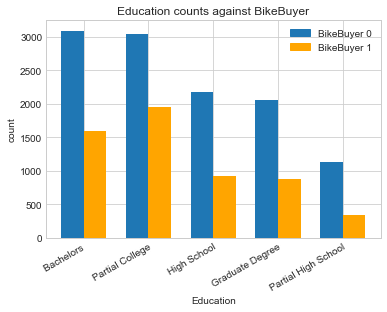

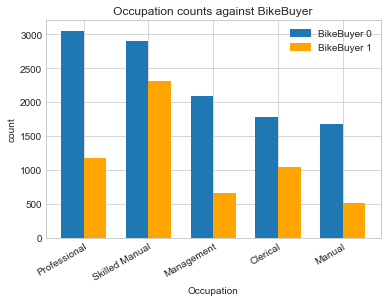

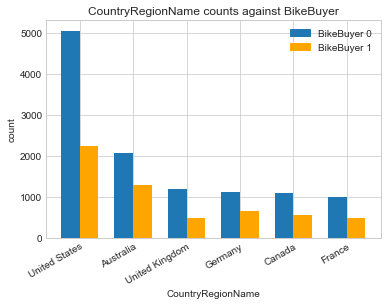

In [45]:
#Function to plot the bar charts
import matplotlib.patches as mpatches

def bar_bikebuyer(col, flat = False):
    plt.ylabel("count")
    plt.xlabel(col)
    bar_width = 0.35
    index = 0
    for element in Final.loc[(Final["BikeBuyer"]==0), col].value_counts().index.tolist():
        plt.bar(index, Final.loc[(Final["BikeBuyer"]==0) & (Final[col]==element), "BikeBuyer"].count(), color="C0", width=bar_width)
        plt.bar(index + bar_width, Final.loc[(Final["BikeBuyer"]==1) & (Final[col]==element), "BikeBuyer"].count(), color="orange", width=bar_width)
        index += 1
    indices = np.arange(len(Final.loc[(Final["BikeBuyer"]==1), col].value_counts().index.tolist()))
    if flat == False:
        plt.xticks(indices + bar_width/2,Final.loc[(Final["BikeBuyer"]==1), col].value_counts().index.tolist(), rotation=30, ha="right", rotation_mode="anchor")
    else:
        plt.xticks(indices + bar_width/2,Final.loc[(Final["BikeBuyer"]==1), col].value_counts().index.tolist())
    plt.title(col + " counts against BikeBuyer")
    blue_patch = mpatches.Patch(color="C0", label="BikeBuyer 0")
    orange_patch = mpatches.Patch(color="orange", label="BikeBuyer 1")
    plt.legend(handles=[blue_patch, orange_patch])
    plt.show()
    
categoricals = ["Education", "Occupation", "CountryRegionName"]
for cat in categoricals:
    bar_bikebuyer(cat)

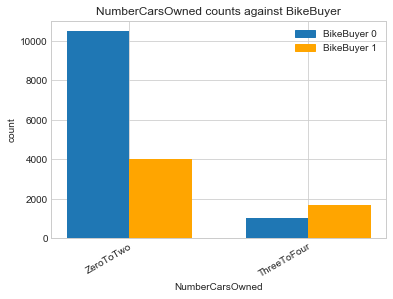

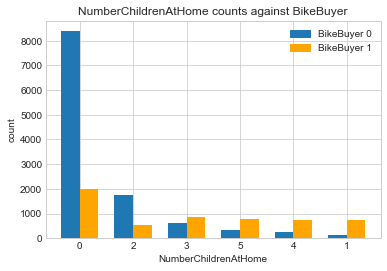

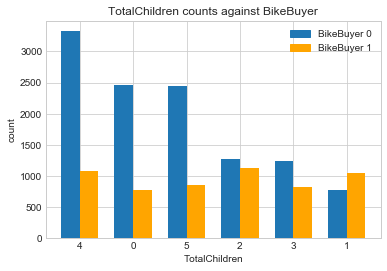

In [46]:
bar_bikebuyer("NumberCarsOwned")
categoricals = ["NumberChildrenAtHome", "TotalChildren"]
for cat in categoricals:
    bar_bikebuyer(cat, True)

Firstly you may notice that the NumberChildrenAtHome and TotalChildren categories are in the wrong order. This is because we are treating them as categorical variables and not attempting to establish a numerical correlation with anything here. You may also notice that there is a consistently lower value for the BikeBuyer than not BikeBuyer for each category of each variable. This is because we have a class imbalance, with slightly more than two thirds of the points having 0 for the label BikeBuyer. However, there otherwise doesn't seem to be a very strong relationship between the 0 and 1 categories of BikeBuyer for each categorical variable. The worst performance with regards to this is from the CountryRegionName variable.

### Numeric variables

To visualise whether or not numeric variables are effective in classifying points as BikeBuyer or not BikeBuyer, we will plot a boxplot and violin plot of the categorical variable of bike buyer against the numeric variables to see if there is a good separation between the two for each of the numeric variables.

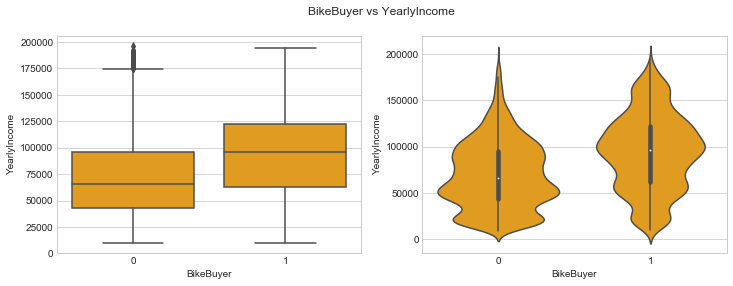

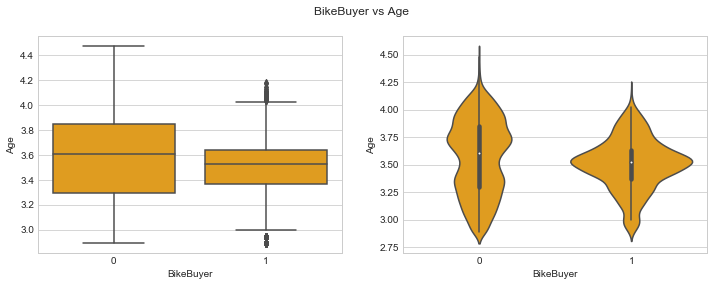

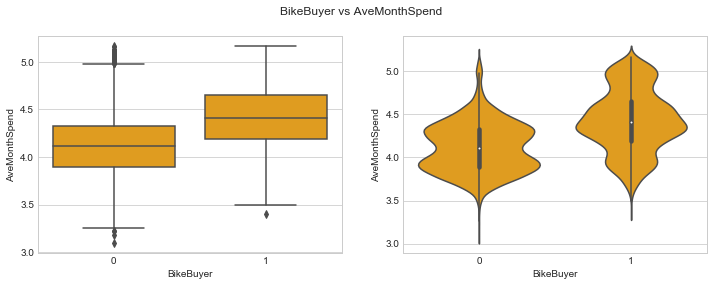

In [47]:
BoxViolin = ["YearlyIncome", "Age", "AveMonthSpend"]
for element in BoxViolin:
    plot_box_violin(Final, "BikeBuyer", 0, element)

Each of these variables demonstrates a decent separation of the BikeBuyer variable with regards to the numeric variable. One thing to note is that the separation for Age isn't as good, but those who did buy bikes fall within a much more narrow range of ages.

## Visualising Data for Regression

The visualisation we might want of categorical variables for regression has already been performed. In the aggregating categories stage we visualised how categorical variables are related to the AveMonthSpend using box and violin plots.

To visualise how numeric variables correlate with AveMonthSpend for regression, we will plot some scatter plots of each numeric variable against the AveMonthSpend. Those numeric variables with a clear relationship with AveMonthSpend will be good predictors for AveMonthSpend.

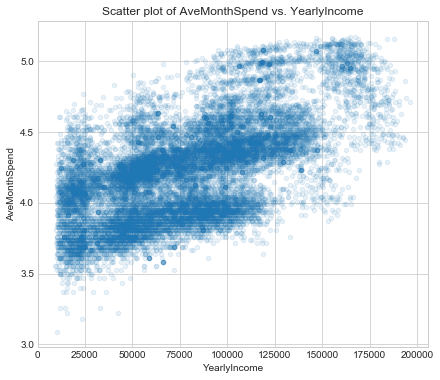

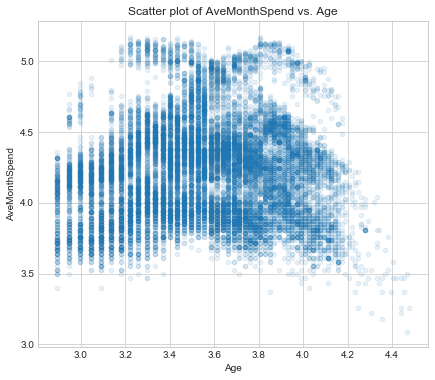

In [48]:
def plot_scatter(Final, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        fig = plt.figure(figsize=(7,6))
        ax = fig.gca() 
        Final.plot.scatter(x = col, y = col_y, ax = ax, alpha=0.1)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel(col_y)
        plt.show()

num_cols = ["YearlyIncome","Age"]
plot_scatter(Final, num_cols)        

There seems to be a good linear correlation of YearlyIncome with AveMonthSpend. AveMonthSpend seems to increase with age until a peak at about 36, then begins to decrease.

A contour, or 2d density plot, can show the structure of the 2d density of a plot, without showing the many variations in the individual points. We will plot a contour plot for each of the numeric variables we are concerned with as well. In this plot a kernel density estimate is also plotted above each axis.

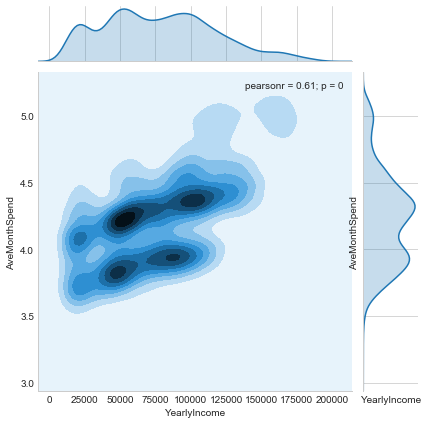

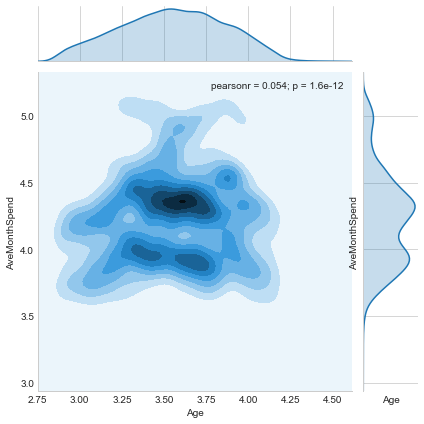

In [49]:
def plot_desity_2d(Final, cols, col_y = 'AveMonthSpend', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=Final, kind=kind)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.show()

plot_desity_2d(Final, num_cols)      

An alternative to the contour plot is the hex bin plot. This is less computationally intensive. The kernel density estimate above each axis is replaced by a histogram.

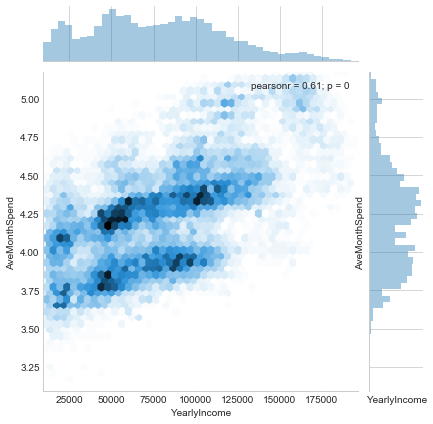

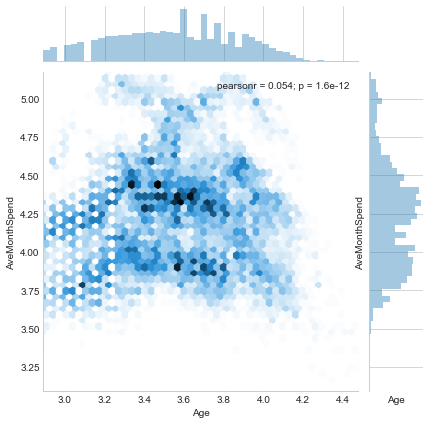

In [50]:
plot_desity_2d(Final, num_cols, kind="hex")  

The efficacy of this particular plot is dependent on the number of bins chosen. Choose too many bins, and certain points bins that should have a low frequency a empty instead (this can be seen in the Age vs AveMonthSpend plot, as certain ages aren't represented). Choose too few bins, and the plot is over-abstracted. However, the hexbin plot often has more detail because bins with as few as a single point are displayed, but generally such low frequency density is ignored by the contour plot.

## Classification Model

Importing required libraries for this section:

In [51]:
import math
import scipy.stats as ss
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

### Creating the model matrix

We will create a classification model to predict if people will or will not buy bikes (ie if points will have BikeBuyer = 1 or BikeBuyer = 0).

We create the numpy array of the label values:

In [52]:
labels = np.array(Final["BikeBuyer"])
labels.size

17209

As previously stated in the data preparation stage, we need to encode the categorical variables to produce the numpy feature array (or model matrix). We do this because the different categories of the categorical variable are uninterpretable. Thus, we will recode them as integers, and then make "dummy variables", which are binary flag variables for each category of the categorical variable. This is because if we encode the categories as integers (ie small=1, medium=2, big=3), then we face a scaling problem as the larger integers will be weighted more heavily.

One hot encoding:
1. Encode the categorical string variables as integers.
2. Transform the integer coded variables to dummy variables.
3. Append each dummy coded categorical variable to the model matrix.
4. Append the numeric variables to the model matrix

In [53]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ["CountryRegionName", "Education", "Occupation",
                       "Gender", "MaritalStatus", "HomeOwnerFlag", "NumberCarsOwned"]

Features = encode_string(Final["StateProvinceName"])
for col in categorical_columns:
    temp = encode_string(Final[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)

## Concatenating the numeric variables to the model matrix
Features = np.concatenate([Features, np.array(Final[["NumberChildrenAtHome", "TotalChildren",
                                                     "YearlyIncome", "Age"]])], axis = 1)
print(Features.shape)

(17209, 45)
(17209, 49)


The 8 categorical variables have been transformed into 45 dummy variables. With the additional 4 numeric variables, there are 49 features in total.

### Class imbalance
If we group the dataframe by the people who did and did not buy bikes. As we can see, there is a class imbalance, with 11504 people not buying bikes, and 5705 buying bikes. Roughly two thirds of the points do not buy bikes.

In [54]:
print("Bikebuyer value counts")
print(Final["BikeBuyer"].value_counts())
print("")
print("Bikebuyer value percentages")
round(Final["BikeBuyer"].value_counts()/17209*100,1)

Bikebuyer value counts
0    11504
1     5705
Name: BikeBuyer, dtype: int64

Bikebuyer value percentages


0    66.8
1    33.2
Name: BikeBuyer, dtype: float64

### Train-test split

Now we will split the cases into training and test data sets. We need to make sure that these two are distinct as this prevents us from training and testing the model on the same data, leading to biased and overly optimistic results. In this stage it is important to remember that we have a class imbalance.

In [55]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 8600)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

### Normalisation

Now we need to rescale the numeric features to make sure that they have a similar range of values. This is because those features with larger ranges will overinfluence the model. We will accomplish this using Zscore normalisation, which is the number of standard deviations a value is above or below the mean.

In [56]:
scaler = preprocessing.StandardScaler().fit(X_train[:,45:])
X_train[:,45:] = scaler.transform(X_train[:,45:])
X_test[:,45:] = scaler.transform(X_test[:,45:])

### Constructing the model

We will construct a logistic regression model. This is similar to a linear regression model except the shape is sigmoidal, with most values close to zero or one. The output is the log likelihood for each of the two classes.

In [57]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Model analysis

First we print the intercept and model coefficients. 

In [58]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.27165769]
[[  1.49309240e-01   5.06968689e-01   5.51057697e-03  -4.41887827e-02
   -3.77445928e-01  -2.99801022e-01   1.89798927e-02  -3.20139748e-02
   -9.49755492e-02   1.19832878e-01  -2.98865934e-02   3.15550251e-02
    1.70786033e-04  -7.04365635e-02  -6.49031648e-02   4.08171414e-01
   -5.28734408e-01   8.38666718e-02   2.61211086e-01  -5.88029881e-01
    2.73181918e-01  -1.39230390e-01   5.51057697e-03  -9.03331985e-02
    6.68498837e-02  -4.41887827e-02  -7.02657775e-02   2.88242245e-01
    1.88735329e-01  -2.51162353e-01  -7.20441103e-02  -4.25428799e-01
    3.68118092e-02  -7.04074690e-01   7.01508588e-02   1.32256138e-01
    1.93198197e-01  -5.00972919e-01   2.29315231e-01  -8.83276595e-01
    6.11618907e-01  -2.11831503e-01  -5.98261852e-02  -7.98386897e-02
   -1.91818998e-01   1.19256596e+00  -5.36759153e-02   5.32792244e-01
   -2.34588036e-01]]


The number of large coefficients indicates that the model is probably overfit.

We can now use the model to predict the probabilities of points being BikeBuyer 0 or 1. We will do this for the X_test points.

In [59]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:10,:])

[[ 0.73859927  0.26140073]
 [ 0.8198989   0.1801011 ]
 [ 0.86744385  0.13255615]
 [ 0.48737314  0.51262686]
 [ 0.72834678  0.27165322]
 [ 0.91941831  0.08058169]
 [ 0.88205015  0.11794985]
 [ 0.74571157  0.25428843]
 [ 0.85894795  0.14105205]
 [ 0.05117219  0.94882781]]


I have printed these probabilities for the first 10 points. The first column is the probability of the point having a BikeBuyer score of 0, and the second column is the probability of the BikeBuyer having a score of 1. Notice that these two probabilities always add to one as these are the only two probabilities. For most of the points the probability of a score of 0 is higher than a score of 1, which is what we expect as roughly two thirds of our points have a BikeBuyer score of 0.

### Scoring and evaluating

We can now transform the probabilities into actual class scores. We can set a threshold probability at which a point will be evaluated as having a score of 1. We will do this for a threshold of 0.5.

In [60]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[0 0 0 1 0 0 0 0 0 1 0 1 0 0 0]
[1 0 0 1 0 0 1 0 1 1 0 1 0 0 0]


The first row is the scores our model predicted for the test data. The second row is the actual scores for the test data. Most of the scores agree, however several do not. We can now evaluate the performance of the model using several metrics.

#### Metrics

A confusion matrix displays all the correctly and incorrectly classified cases in a table. The structure is as follows:

| | Scored Positive | Scored Negative|  
|------|:------:|:------:| 
|**Actual Positive** | True Positive | False Negative |
|**Actual Negative**| False Positive | True Negative |

- True Positive or TP are cases with positive labels which have been correctly classified as positive.
- True Negative or TN are cases with negative labels which have been correctly classified as negative.
- False Positive or FP are cases with negative labels which have been incorrectly classified as positive.
- False Negative or FN are cases with positive labels which have been incorrectly classified as negative.

For us the "postive" label is a value of 1 for BikeBuyer, and the "negative" label is a value of 0 for BikeBuyer.

Metrics definitions:
- **Accuracy** = (TP + TN)/(TP + FP + TN + FN)
- Accuracy is the fraction of cases correctly classified.
- **Precision** = (TP)/(TP + FP) or (FP)/(TP + FP)
- Precision is the fraction of correctly classified cases out of all cases classified as something. (How many selected items are relevant?)
- **Recall/Sensitivity** = (TP)/(TP + FN) or (FP)/(FP + TN)
- Recall (also called sensitivity) is the fraction of correctly classified cases out of all cases with that label value. (How many relevant items are selected?)
- **F1** = 2 x (Precision x recall)/(precision + recall)
- F1 is a weighted average of precision and recall.

In [61]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      5147               589
Actual negative      1270              1594

Accuracy  0.78
 
           Positive      Negative
Num case     5736          2864
Precision    0.80          0.73
Recall       0.90          0.56
F1           0.85          0.63


The overall accuracy of the model is 0.83, which is decent. However, we can see that a disproportionate number of actually negative cases are scored wrongly. This is expected due to the class imbalance of having twice as many positive labels as negative labels. This poor performance of the negative cases is shown by the lower scores of the negative cases.

#### ROC and AUC

The receiver operating characteristic (ROC) is a curve which shows how the true positive rate (y axis) varies with the false positive rate (x axis). In principle, the point at which the model operates along this curve can be chosen, either minimising false positive rate at the expense of the true positive rate, or maximising true positive rate but increasing the false positive rate. The AUC is the area under the curve, or the integral of the ROC curve. The larger the AUC, the better the performance of the model.

ROC curve for balanced two-class problem

<img src="img/ROC_AUC.jpg" width=450>

A perfect classifier has a true positive rate of 1 and an AUC of 1, whereas random guesses has an AUC of 0.5. We will not plot the ROC, and find the AUC.

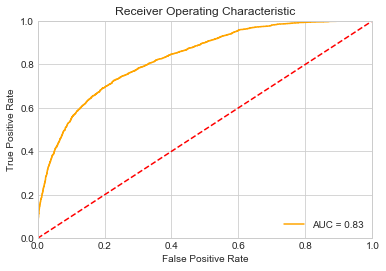

In [62]:
def plot_auc(labels, probs):
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)    

The ROC curve has an AUC of 0.83, and is between the "naive" classifier with an AUC of 0.5, and the perfect classifier with an AUC of 1.

### Weighted models

If we wanted to, we could weight the model to favour correctly classifying positive labels or negative labels. However, increasing one of these would harm the other. We can accomplish this in two ways:
- Weight the classes of the logistic regression model
- Change the threshold of the logistic regression model

This is normally done if one of the classes is more important to classify correctly, for example if one of the classes has a higher cost associated with a misclassification. However, for our particular model we are only interested in the overall accuracy and don't favour either class.

### Feature Selection

Importing required libraries for this section:

In [63]:
from sklearn import feature_selection as fs
from sklearn import metrics, cross_validation

C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Feature selection is the stage where we will remove features which will not help with our model. Including these superfluous features in our model will not only not help our model, but may hinder it as they may cause over-fitting and prevent our model from generalising. We will eliminate features with low and zero variance, and uninformative features. Features with zero variance have only the same values, so will not provide our model with any information. Low variance features have mostly the same values, and only a few unique values. Uninformative features do not significantly improve model performance, and increase variance of model predictions.

#### Eliminating low variance features

We will make another model where we eliminate the features with a variance beyond the threshold of 80%. Let's see if using feature selection will help improve our model performance.

In [64]:
print(Features.shape)

## Define the variance threhold and fit the threshold to the feature array. 
sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
Features_reduced = sel.fit_transform(Features)

## Print the support and shape for the transformed features
print(sel.get_support())
print(Features_reduced.shape)

(17209, 49)
[False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False  True  True False False  True False False False False  True
  True  True  True  True  True  True  True False False  True  True  True
 False]
(17209, 15)


Apparently there are 34 features with a variance of less than 0.8, which have all been eliminated from the model, leaving only 15 high variance features.

#### Selecting k best features

Cross validation is a process by which we split the data set into a number of different sections, or "folds". We then recurse through each fold, training on every other fold and testing on that fold. This gives us a more representative view of the average performance of our model. Nested cross validation splits the data even further into train, validation, and test splits. It is generally used to test optimal hyperparameters.

While the low variance features have been eliminated, the remaining features could still be uninformative. We will use 10-fold nested cross validation to analyse which features are informative. Features are recursively removed and cross validation is used to find the change in model performance (according to our chosen scoring metric of the AUC) and thus decide whether the feature should be removed.

In [65]:
## Reshape the Label array
labels = labels.reshape(labels.shape[0],)

## Set folds for nested cross validation
nr.seed(988)
feature_folds = ms.KFold(n_splits=10, shuffle = True)

## Define the model
logistic_mod = linear_model.LogisticRegression(C = 10) 

## Perform feature selection by CV with high variance features only
nr.seed(6677)
selector = fs.RFECV(estimator = logistic_mod, cv = feature_folds,
                      scoring = 'roc_auc')
selector = selector.fit(Features_reduced, labels)
selector.support_ 

array([False, False,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False], dtype=bool)

Some features marked True are selected, and others marked False are eliminated.

In [66]:
selector.ranking_

array([2, 5, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 6])

The ranking shows the relative importance of features. Features which we keep have a ranking of one, and features with higher rankings we eliminate. The higher the number the less of an effect is has on the AUC.

In [67]:
Features_reduced = selector.transform(Features_reduced)
Features_reduced.shape

(17209, 10)

We apply the feature selection to reduce the number of features to only 10 now.

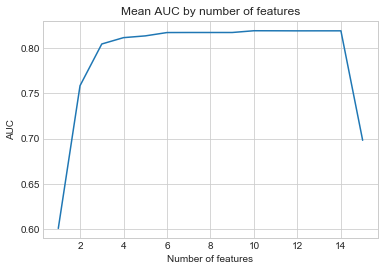

In [68]:
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.title('Mean AUC by number of features')
plt.ylabel('AUC')
plt.xlabel('Number of features')

This graph shows how the AUC changes with the selection of different numbers of features out of the 15 high variance features. We can see that 3 features contribute to the majority of the predictive power of the model. Including more features does not drastically change this predictive power, but including all the high variance features results in a decrease of the AUC.

### Cross validation

We will now use nested cross validation to optimise the model hyperparameter of "C". "C" is the inverse of the regularisation strength for the logistic regression model. We will then test the model performance with regards to the AUC with the reduced features.

In [69]:
## Constructing the folds
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)

## Performing the grid search for the optimal model hyperparameter
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"C": [0.1, 1, 10, 100, 1000]}
## Define the logistic regression model
logistic_mod = linear_model.LogisticRegression() 

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = logistic_mod, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)

## Fit the cross validated grid search over the data 
clf.fit(Features_reduced, labels)

## And print the best parameter value
clf.best_estimator_.C

1

The optimal hyperparameter we found was 1 for "C", the inverse of regularisation strength. We can visualise the performance of the different values of C.

Performance metrics by parameter
Parameter   Mean performance   STD performance
    0.10        0.81901            0.01293
    1.00        0.81902            0.01291
   10.00        0.81899            0.01292
  100.00        0.81900            0.01292
 1000.00        0.81900            0.01292


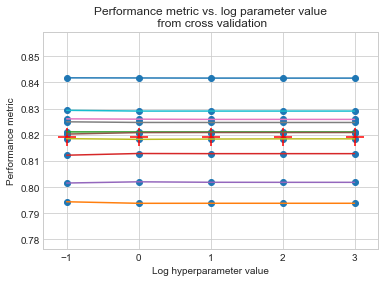

In [70]:
def plot_cv(clf, params_grid, param = 'C'):
    params = [x for x in params_grid[param]]
  
    keys = list(clf.cv_results_.keys())              
    grid = np.array([clf.cv_results_[key] for key in keys[6:16]])
    means = np.mean(grid, axis = 0)
    stds = np.std(grid, axis = 0)
    print('Performance metrics by parameter')
    print('Parameter   Mean performance   STD performance')
    for x,y,z in zip(params, means, stds):
        print('%8.2f        %6.5f            %6.5f' % (x,y,z))
    
    params = [math.log10(x) for x in params]
    
    plt.scatter(params * grid.shape[0], grid.flatten())
    p = plt.scatter(params, means, color = 'red', marker = '+', s = 300)
    plt.plot(params, np.transpose(grid))
    plt.title('Performance metric vs. log parameter value\n from cross validation')
    plt.xlabel('Log hyperparameter value')
    plt.ylabel('Performance metric')
    
plot_cv(clf, param_grid)    

Each line of points is a different inner fold of our cross validation. The red crosses are the mean performances across the folds. Notice that the mean performance barely changes as the C parameter changes, and that the difference is within much less than a standard deviation. This indicates that C does not have a significant effect on the performance of the model.

Now we will perform the outer loop of the nested cross validation.

In [71]:
nr.seed(498)
cv_estimate = ms.cross_val_score(clf, Features, labels, 
                                 cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.825
SDT of the metric       = 0.009
Outcomes by cv fold
Fold  1    0.806
Fold  2    0.824
Fold  3    0.828
Fold  4    0.835
Fold  5    0.833
Fold  6    0.822
Fold  7    0.836
Fold  8    0.814
Fold  9    0.819
Fold 10    0.832


The performance metric for the outer loops is slightly higher than that for the inner loops, but not significantly.

Let's now build a new model with the reduced features and the optimal hyperparameter of C.

In [72]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features_reduced.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features_reduced[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features_reduced[indx[1],:]
y_test = np.ravel(labels[indx[1]])

## Define and fit the logistic regression model
logistic_mod = linear_model.LogisticRegression(C = 1) 
logistic_mod.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:10,:])
scores = score_model(probabilities, 0.5)

[[ 0.92143735  0.07856265]
 [ 0.79151567  0.20848433]
 [ 0.3120593   0.6879407 ]
 [ 0.59716967  0.40283033]
 [ 0.44141242  0.55858758]
 [ 0.24742005  0.75257995]
 [ 0.59590838  0.40409162]
 [ 0.90595008  0.09404992]
 [ 0.96332604  0.03667396]
 [ 0.24067149  0.75932851]]


                 Confusion matrix
                 Score positive    Score negative
Actual positive       177                12
Actual negative        49                62

Accuracy  0.80
 
           Positive      Negative
Num case      189           111
Precision    0.78          0.84
Recall       0.94          0.56
F1           0.85          0.67


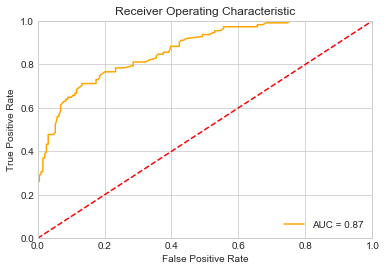

In [74]:
print_metrics(y_test, scores)    
plot_auc(y_test, probabilities)   

The model with the reduced features and the optimal hyperparameter selected only performs slightly better than the original model. However, this difference doesn't seem very significant.

## Regression Model

### Creating the model matrix

We will create a regression model to predict the AveMonthSpend of customers.

We create the numpy array of the label values:

In [75]:
labels = np.array(Final["AveMonthSpend"])
labels.size

17209

Like the classification model, we again need to encode the categorical variables using one hot encoding. The steps are the same. We end up with 45 dummy variables, plus 4 numeric variables for a total of 49 features.

In [76]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ["CountryRegionName", "Education", "Occupation",
                       "Gender", "MaritalStatus", "HomeOwnerFlag", "NumberCarsOwned"]

Features = encode_string(Final["StateProvinceName"])
for col in categorical_columns:
    temp = encode_string(Final[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)

## Concatenating the numeric variables to the model matrix
Features = np.concatenate([Features, np.array(Final[["NumberChildrenAtHome", "TotalChildren",
                                                     "YearlyIncome", "Age"]])], axis = 1)
print(Features.shape)

(17209, 45)
(17209, 49)


### Class imbalance

There are no real "classes" in this problem, as it is a regression problem and not a classification problem, thus the variable we are concerned with predicting is not definite and doesn't have defined categories. However, it is still useful to think about the spread of data.

If you remember from the data preparation stage, we have already visualised the frequency density of the AveMonthSpend numeric variable. We decided that it was too skewed, so applied a logarithmic transformation to this variable, resulting in the following frequency density.

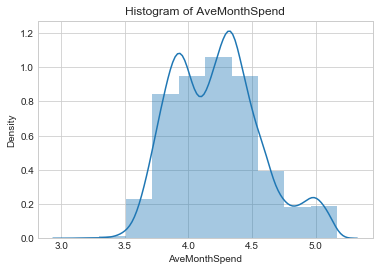

In [77]:
plot_density_hist(Final, "AveMonthSpend", bins=10, hist=True)

The frequency density is slightly multimodal. Also notice that we have very few data points for (log) AveMonthSpend being less than 3.5, and that the left side of the frequency density graph tails off very quickly in comparison with the right side. This may mean that our predictive power will suffer when it comes to predicting the monthly spendage of customers who spend less.

### Train-test split

Again we need to split the data set using random bernoulli sampling to ensure that we don't train and test using the same data set giving false confidence to our results.

In [78]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 8600)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

### Normalisation

We again normalise the numeric variables using Zscore normalisation to prevent them from having an undue effect on the model.

In [79]:
scaler = preprocessing.StandardScaler().fit(X_train[:,45:])
X_train[:,45:] = scaler.transform(X_train[:,45:])
X_test[:,45:] = scaler.transform(X_test[:,45:])

### Constructing the model

We construct a linear regression model, and fit the training data to it.

In [80]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

### Model analysis

We can now print out the intercept and model coefficients. The intercept is zero. The coefficients tell us which features the model correlates positively or negatively with. The coefficients for the dummy variables are all in a similar range, whereas the numeric variables' ranges differ much more.

In [81]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[  4.40165317e+10   4.40165317e+10   4.61021030e+09   4.61021030e+09
   4.40165317e+10   4.40165317e+10   1.53673677e+09   4.40165317e+10
   1.53673677e+09   4.40165317e+10   1.53673677e+09   1.53673677e+09
   3.07347353e+09   3.07347353e+09   1.53673677e+09   1.31720294e+09
   1.31720294e+09   1.31720294e+09   1.31720294e+09   1.31720294e+09
   1.31720294e+09   7.68368383e+09   4.61021030e+09   7.90321766e+09
  -3.47961111e+10   4.61021030e+09   6.14694707e+09  -7.68368383e+08
  -7.68368383e+08  -7.68368383e+08  -7.68368383e+08  -7.68368383e+08
  -7.68368383e+08  -7.68368383e+08  -7.68368383e+08  -7.68368383e+08
  -7.68368383e+08  -1.92092096e+09  -1.92092096e+09  -1.92092096e+09
  -1.92092096e+09  -1.92092096e+09  -1.92092096e+09  -1.92092096e+09
  -1.92092096e+09   1.99033737e-01   4.59289551e-03   1.05375290e-01
  -1.45092010e-02]


### Scoring and evaluating

We will now evaluate the model using a number of different metrics.

#### Residuals

The residual is the difference between the predicted value (score) and actual value.  There are many general metrics to place a single number on the overall residuals between the predicted values and the actual values:
- **Mean squared error** (MSE):

$$MSE = \frac{1}{N} \sum_{i=1}^N (f(x_i) - y_i)^2$$

The variance of the residuals, which is what linear regression attempts to minimise.

- **Root mean squared error** (RMSE):

$$RMSE = \sqrt{ \frac{1}{N} \sum_{i=1}^N (f(x_i) - y_i)^2}$$

The standard deviation of the residuals.

- **Mean absolute error** (MAE):

$$MAE = \frac{1}{N} \sum_{i=1}^N |f(x_i) - y_i|$$  

Similar to the root mean squared error, the average of the magnitude of the residuals.

- **Median absolute error**:

$$Median\ Absolute\ Error = Median \big( \sum_{i=1}^N |f(x_i) - y_i| \big)$$   

A measure of how large most residuals are. If this differs significantely from the mean absolute error it could be an indication that there are outliers in the residuals.

- **R squared / coefficient of determiniation** ($R^2$):

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$  

where,   
$SS_{res} = \sum_{i=1}^N r_i^2$, or the sum of the squared residuals,   
$SS_{res} = \sum_{i=1}^N y_i^2$, or the sum of the squared label values.

A meausre of how much the model has reduced the sum of squares of the labels. If $R^2$ is zero, the model is useless. If the model fits the data perfectly, then $R^2$ is one.

- **Adjusted R squared** ($R^2_{adj}$):

$$R^2_{adj} = 1 - \frac{var(r)}{var(y)} = 1 - \frac{\frac{SS_{res}}{(n - p -1)}}{\frac{SS_{tot}}{(n-1)}}$$  
where,   
$var(r) = $ the variance of the residuals,   
$var(y) = $ the variance of the labels,
$n = $ the number of samples or cases,
$p = $ number of model parameters.  

Similar to $R^2$. However, if the number of parameters is significant with respect to the number of cases, $R^2$ will give an overly optimistic measure of model performance. In general, the difference between $R^2_{adj}$ and $R^2$ becomes less significant as the number of cases $n$ grows. However, even for 'big data' models there can be a significant difference if there are a large number of model parameters.

In [82]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
scores = lin_mod.predict(X_test) 
print_metrics(y_test, scores, 45)    

Mean Square Error      = 0.00421381995963
Root Mean Square Error = 0.06491394272136085
Mean Absolute Error    = 0.0485465255228
Median Absolute Error  = 0.0389092009586
R^2                    = 0.964388040006
Adjusted R^2           = 0.96420488089


Both the MSE and RMSE are very low, indicating very small residuals. The MAE and median absolute error are both small and quite close together, indicating good fit and few significant outliers. The $R^2_{adj}$ and $R^2$ are both extremely close to one, indicating that the model is making useful predictions.

#### Residual histogram

We can plot a kernel density plot and histogram of the residuals of the regression model to visualise the frequency density of the residuals.

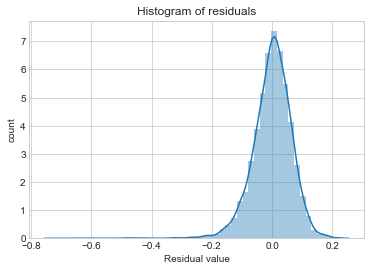

In [83]:
def hist_resids(y_test, scores):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), scores.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()
    
hist_resids(y_test, scores)

The residuals seem to follow a very sharp normal distribution, which is the expected distribution for a well fit model. The peak is centered on a residual value of 0, indicating that most residual values are very close to zero. However, the model is significanly left skewed, although there aren't very many residuals in the "tail" on the left hand side. This indicates that we underestimated a significant amount of our label values. This is probably because of the lack of data for points with very low AveMonthSpend, as seen in the frequency distribution of AveMonthSpend.

#### Quantile-Quantile normal plot

The quantile-quantile normal plot, or Q-Q normal plot displays the quantiles of a standard normal distribution on the horizontal axis, and the quantiles of the residuals on the y-axis. Thus, if the residuals are perfectly normally distributed, they should fall perfectly on the line.

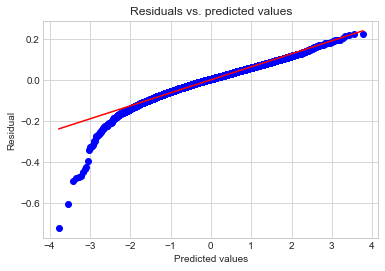

In [84]:
def resid_qq(y_test, scores):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), scores.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
    
resid_qq(y_test, scores)   

As we saw with the residual histogram, our model has a significant number of residuals which are more negative than expected, meaning that we underestimate the values of a significant number of points. However, most of the other points fall very nicely on the line so are approximately normal, as seen in the kernel density plot and histogram.

#### Residual plot

A plot of residuals vs the predicted values (scores) shows if there is any inherent strucure in the residuals. Ideally, there should be none.

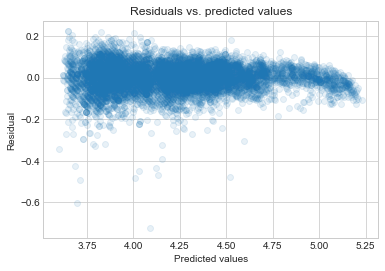

In [85]:
def resid_plot(y_test, scores):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), scores.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(scores, resids, fit_reg=False, scatter_kws={'alpha':0.1})
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()

resid_plot(y_test, scores) 

We can see that the residuals for the smaller predicted values of AveMonthSpend have a much larger variance, meaning that larger AveMonthSpends are predicted with greater accuracy. The majority of residuals are centered around 0, but towards the very high AveMonthSpend values the residuals decrease and we tend to underestimate AveMonthSpend. We can see that there are a significant number of large negative residuals, as spotted in previous visualisations. These large negative residuals are mainly for smaller values of AveMonthSpend. In conclusion our model doesn't predict as well for small and very large values of AveMonthSpend.

However, if you remember, these are actually the logarithms of the AveMonthSpend, because we applied a log transformation to AveMonthSpend in the data preparation stage. Let's see if the untransformed AveMonthSpends look any better.

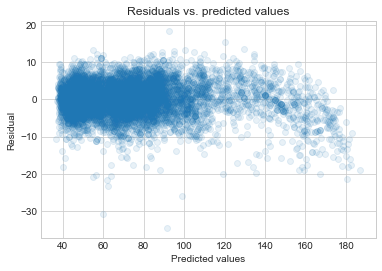

In [86]:
scores_untransform = np.exp(scores)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, scores_untransform) 

These results are much worse than the transformed AveMonthSpend. The residuals go up an order of magnitude, meaning that the difference between our predictions and the true values are consistently much larger. The residuals seem to be linear for most of the first half of the plot, which is good as there is no heteroscedasity or nonlinear structure. However, for higher values of AveMonthSpend the residuals become very large and negative.

### Regularisation and the bias-variance tradeoff

We will attempt to use regularisation in this stage to see if we can prevent a second model from overfitting and help it to generalise better.

Regularisation is a tool used to prevent the model from learning the training data too closely, and thus internalising noise. While regularisation reduces the variance in the model's results, it introduces bias, meaning that the predictions are likely to be closer to the bulk test data.

#### l2 regularisation

l2 regularisation, also known as ridge regression, applies a penalty proportional to the l2 or euclidian norm of the model weights to the loss function. Thus, the regularisation applies a penalty to having too large model weights - ie having the model fit the data too closely. Thus, the total error for the linear regression using RMSE as the metric, the total loss function is the sum of the RMSE and the regularisation term. The model then attempts to minimise this total loss function. l2 regularisation is a soft constraint, meaning the model coefficients are driven close to, but not always exactly to zero.

Let's use a grid of 100 different l2 penalty parameters to find the optimal l2 penalty parameter to minimise the RMSE for the test data. We then create two plots, one of the RMSE against the regularisation parameter, and another of the values of the model coefficients vs the regularisation parameter.

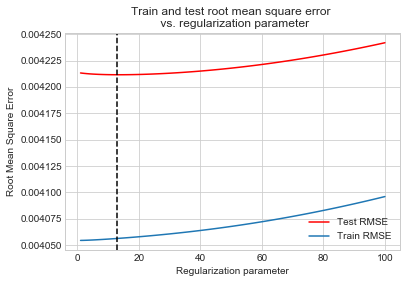

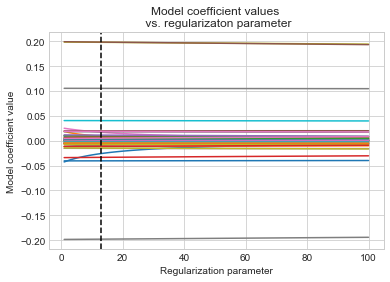

(13, 0.0042115475203957486)


In [87]:
def plot_regularization(l, train_RMSE, test_RMSE, coefs, min_idx, title):   
    plt.plot(l, test_RMSE, color = 'red', label = 'Test RMSE')
    plt.plot(l, train_RMSE, label = 'Train RMSE')    
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.legend()
    plt.xlabel('Regularization parameter')
    plt.ylabel('Root Mean Square Error')
    plt.title(title)
    plt.show()
    
    plt.plot(l, coefs)
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.title('Model coefficient values \n vs. regularizaton parameter')
    plt.xlabel('Regularization parameter')
    plt.ylabel('Model coefficient value')
    plt.show()

def test_regularization_l2(x_train, y_train, x_test, y_test, l2):
    train_RMSE = []
    test_RMSE = []
    coefs = []
    for reg in l2:
        lin_mod = linear_model.Ridge(alpha = reg)
        lin_mod.fit(x_train, y_train)
        coefs.append(lin_mod.coef_)
        y_score_train = lin_mod.predict(x_train)
        train_RMSE.append(sklm.mean_squared_error(y_train, y_score_train))
        y_score = lin_mod.predict(x_test)
        test_RMSE.append(sklm.mean_squared_error(y_test, y_score))
    min_idx = np.argmin(test_RMSE)
    min_l2 = l2[min_idx]
    min_RMSE = test_RMSE[min_idx]
    
    title = 'Train and test root mean square error \n vs. regularization parameter'
    plot_regularization(l2, train_RMSE, test_RMSE, coefs, min_l2, title)
    return min_l2, min_RMSE
     
l2 = [x for x in range(1,101)]
out_l2 = test_regularization_l2(X_train, y_train, X_test, y_test, l2)
print(out_l2)

The optimal regularisation parameter we found for l2 normalisation was 13, marked by the vertical dashed line. To the left of this line the variance dominates the bias, and to the right the bias dominates the variance.

We can see from the bottom plot that as the regularisation parameter increases the coefficients become more tightly clustered, giving a more constrained, lower variance model, but more biased.

We will now create and evaluate a new linear regression model using the optimal l2 regularisation parameter.

Mean Square Error      = 0.0042115475204
Root Mean Square Error = 0.06489643688520771
Mean Absolute Error    = 0.0485504774045
Median Absolute Error  = 0.0390630631621
R^2                    = 0.964407244912
Adjusted R^2           = 0.96422418457


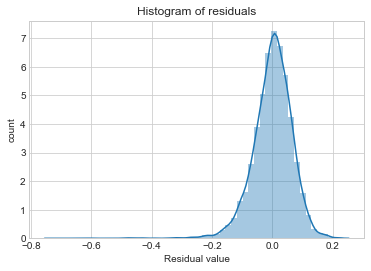

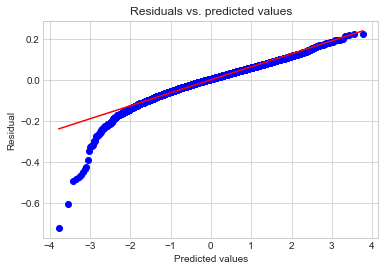

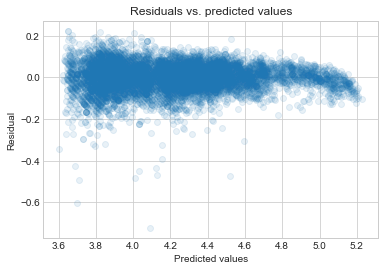

In [88]:
lin_mod_l2 = linear_model.Ridge(alpha = out_l2[0])
lin_mod_l2.fit(X_train, y_train)
y_score_l2 = lin_mod_l2.predict(X_test)

print_metrics(y_test, y_score_l2, 45)
hist_resids(y_test, y_score_l2)  
resid_qq(y_test, y_score_l2) 
resid_plot(y_test, y_score_l2)

The results with the optimal l2 regularisation are only minimally better than without. In fact, we can disregard this difference, as using l2 regularisation increases the bias of the model and thus makes it less likely to generalise well.

#### l1 regularisation

l1 regularisation, also called lasso regression, limits the sum of the absolute values of the model coefficients (the Manhattan norm), as opposed to the square root of the sums of the squares of the model coefficients (the Euclidean norm). The l1 norm is more likely to push the coefficients directly to zero, as opposed the l2 norm which is more forgiving.

Let's use a grid of 100 different l1 penalty parameters to find the optimal l1 penalty parameter to minimise the RMSE for the test data. We then create two plots, one of the RMSE against the regularisation parameter, and another of the values of the model coefficients vs the regularisation parameter.

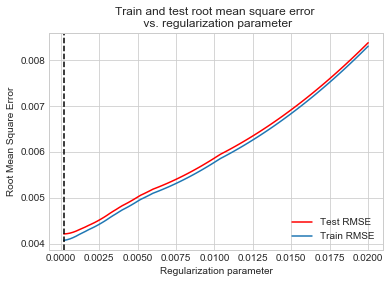

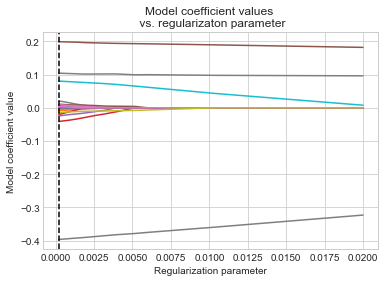

(0.0002, 0.0042105024701294142)


In [89]:
def test_regularization_l1(X_train, y_train, X_test, y_test, l1):
    train_RMSE = []
    test_RMSE = []
    coefs = []
    for reg in l1:
        lin_mod = linear_model.Lasso(alpha = reg)
        lin_mod.fit(X_train, y_train)
        coefs.append(lin_mod.coef_)
        y_score_train = lin_mod.predict(X_train)
        train_RMSE.append(sklm.mean_squared_error(y_train, y_score_train))
        y_score = lin_mod.predict(X_test)
        test_RMSE.append(sklm.mean_squared_error(y_test, y_score))
    min_idx = np.argmin(test_RMSE)
    min_l1 = l1[min_idx]
    min_RMSE = test_RMSE[min_idx]
    
    title = 'Train and test root mean square error \n vs. regularization parameter'
    plot_regularization(l1, train_RMSE, test_RMSE, coefs, min_l1, title)
    return min_l1, min_RMSE
    
l1 = [x/5000 for x in range(1,101)]
out_l1 = test_regularization_l1(X_train, y_train, X_test, y_test, l1)
print(out_l1)

The optimal hyperparameter we found was a regularisation strength of only 0.0002, which is insignificant. We can see that the l1 normalisation help the performance of this particular model at all. THis means that the data has a very low variance, so performing any l1 normalisation causes the bias to dominate the variance.

Notice, however, how the l1 normalisation quickly drives many of the model coefficients to zero, as opposed to the slow curving decreases of the l2 normalisation.

Mean Square Error      = 0.00421050247013
Root Mean Square Error = 0.0648883847088939
Mean Absolute Error    = 0.0485706895925
Median Absolute Error  = 0.0390193568629
R^2                    = 0.964416076871
Adjusted R^2           = 0.964233061954


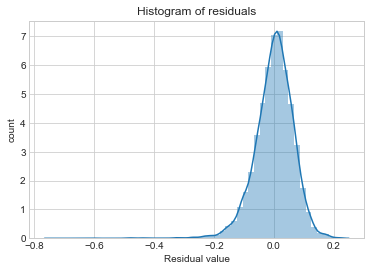

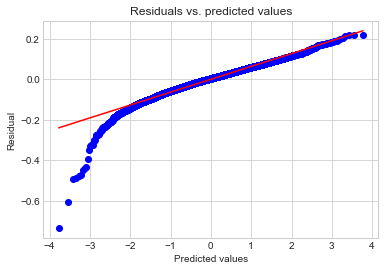

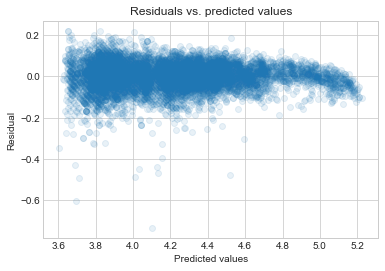

In [90]:
lin_mod_l1 = linear_model.Lasso(alpha = out_l1[0])
lin_mod_l1.fit(X_train, y_train)
y_score_l1 = lin_mod_l1.predict(X_test)

print_metrics(y_test, y_score_l1, 45) 
hist_resids(y_test, y_score_l1)  
resid_qq(y_test, y_score_l1) 
resid_plot(y_test, y_score_l1) 

The l1 normalisation hasn't impacted the results enough to be termed significant.

### Summary
In conclusion, this is what we have accomplished through the course of this case study. We created and explored the Adventure Works Customers data set using pandas and numpy. We performed data preparation by visualising the data using a combination of matplotlib and seaborn, and used numpy and pandas to transform the data into something useful for our model. We made more plots to help us decide how to make our models. We performed the necessary transformation on the data to make it useful to the model, including one hot encoding and normalisation. We created a classification model to predict whether customers would buy bikes using scikit learn, used feature selection and nested cross validation to improve it, and evaluated it using a number of metrics. We created a regression model to predict the average monthly spendage of customers, used normalisation to improve it, and evaluated it using a number of metrics.